# Customer segmentation using Clustering




In this project, I will analyze customer data from a grocery store to group customers into different categories based on their similarities. This process, called customer segmentation, helps to better understand and serve different types of customers. By identifying distinct groups, the business can tailor its products and services to meet the unique needs and preferences of each group, improving customer satisfaction and focusing on the most valuable customers







<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
  <p style="background-color:#2C3E50; font-family:Arial, sans-serif; color:#ECF0F1; font-size:18px; text-align:center; padding:15px; border-radius:8px; margin-bottom:25px; letter-spacing:1px; font-weight:bold;">TABLE OF CONTENTS</p>

  <ul style="list-style-type:none; padding:0; margin:0;">
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#1" style="text-decoration:none; color:#2C3E50; font-weight:normal;">1. IMPORTING LIBRARIES</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#2" style="text-decoration:none; color:#2C3E50; font-weight:normal;">2. LOADING DATA</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#3" style="text-decoration:none; color:#2C3E50; font-weight:normal;">3. DATA CLEANING</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#4" style="text-decoration:none; color:#2C3E50; font-weight:normal;">4. DATA PREPROCESSING</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#5" style="text-decoration:none; color:#2C3E50; font-weight:normal;">5. DIMENSIONALITY REDUCTION</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#6" style="text-decoration:none; color:#2C3E50; font-weight:normal;">6. CLUSTERING</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#7" style="text-decoration:none; color:#2C3E50; font-weight:normal;">7. EVALUATING MODELS</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#8" style="text-decoration:none; color:#2C3E50; font-weight:normal;">8. PROFILING</a></li>
    <li style="padding:12px; border-bottom: 1px solid #BDC3C7; font-size:16px;"><a href="#9" style="text-decoration:none; color:#2C3E50; font-weight:normal;">9. CONCLUSION</a></li>
    <li style="padding:12px; font-size:16px;"><a href="#10" style="text-decoration:none; color:#2C3E50; font-weight:normal;">10. END</a></li>
  </ul>
</div>



In [ ]:
pip install yellowbric

In [41]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
<p style="background-color:#2C3E50; font-family:Arial, sans-serif; color:#ECF0F1; font-size:18px; text-align:center; padding:15px; border-radius:8px; margin-bottom:25px; letter-spacing:1px; font-weight:bold;">LOADING DATA </p>


In [42]:
#dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Attributes

In [43]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [44]:
data.shape

(2240, 29)

# These are the features of this data set



## <span style="color: #2980B9;">people</span>

- <span style="color: #16A085;">**ID**</span>: Customer's unique identifier  

- <span style="color: #16A085;">**Year_Birth**</span>: Customer's birth year  

- <span style="color: #16A085;">**Education**</span>: Customer's education level  

- <span style="color: #16A085;">**Marital_Status**</span>: Customer's marital status  

- <span style="color: #16A085;">**Income**</span>: Customer's yearly household income  

- <span style="color: #16A085;">**Kidhome**</span>: Number of children in customer's household  

- <span style="color: #16A085;">**Teenhome**</span>: Number of teenagers in customer's household  

- <span style="color: #16A085;">**Dt_Customer**</span>: Date of customer's enrollment with the company  

- <span style="color: #16A085;">**Recency**</span>: Number of days since customer's last purchase  

- <span style="color: #16A085;">**Complain**</span>: 1 if the customer complained in the last 2 years, 0 otherwise  

---

## <span style="color: #2980B9;">Products</span>

- <span style="color: #16A085;">**MntWines**</span>: Amount spent on wine in the last 2 years  

- <span style="color: #16A085;">**MntFruits**</span>: Amount spent on fruits in the last 2 years  

- <span style="color: #16A085;">**MntMeatProducts**</span>: Amount spent on meat in the last 2 years  

- <span style="color: #16A085;">**MntFishProducts**</span>: Amount spent on fish in the last 2 years  

- <span style="color: #16A085;">**MntSweetProducts**</span>: Amount spent on sweets in the last 2 years  

- <span style="color: #16A085;">**MntGoldProds**</span>: Amount spent on gold in the last 2 years  

---

## <span style="color: #2980B9;">Promotion</span>

- <span style="color: #16A085;">**NumDealsPurchases**</span>: Number of purchases made with a discount  

- <span style="color: #16A085;">**AcceptedCmp1**</span>: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  

- <span style="color: #16A085;">**AcceptedCmp2**</span>: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  

- <span style="color: #16A085;">**AcceptedCmp3**</span>: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  

- <span style="color: #16A085;">**AcceptedCmp4**</span>: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  

- <span style="color: #16A085;">**AcceptedCmp5**</span>: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  

- <span style="color: #16A085;">**Response**</span>: 1 if customer accepted the offer in the last campaign, 0 otherwise  

---

## <span style="color: #2980B9;">Place</span>

- <span style="color: #16A085;">**NumWebPurchases**</span>: Number of purchases made through the company’s website  

- <span style="color: #16A085;">**NumCatalogPurchases**</span>: Number of purchases made using a catalogue  

- <span style="color: #16A085;">**NumStorePurchases**</span>: Number of purchases made directly in stores  

- <span style="color: #16A085;">**NumWebVisitsMonth**</span>: Number of visits to company’s website in the last month  

---


<a id="2"></a>
        <p style="background-color:#2C3E50; font-family:Arial, sans-serif; color:#ECF0F1; font-size:18px; text-align:center; padding:15px; border-radius:8px; margin-bottom:25px; letter-spacing:1px; font-weight:bold;">DATA PREPROCESSING</p>


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i



## Data Cleaning Process

### 1. Handling Missing Values

- **Problem**:  
  The **Income** column has missing values, and we need to handle them. One common approach is to drop rows that have missing data.

- **Action**:  
  The `dropna()` function is used to remove rows with missing income values, reducing the total number of entries. The assumption here is that the missing income data is not recoverable or critical for modeling.

---

### 2. Date Parsing and Feature Creation

- **Problem**:  
  `Dt_Customer` is the date when a customer joined the database, but it's not in the proper DateTime format.

- **Action**:  
  Convert the `Dt_Customer` column into a DateTime object, then calculate the number of days each customer has been in the database relative to the most recent customer. This is stored in the new feature **Customer_For**.

---

### 3. Categorical Features

- **Problem**:  
  Some columns, like **Marital_Status** and **Education**, are categorical (strings), and these need to be converted into numeric values for modeling.

- **Action**:  
  The next step involves converting categorical variables into numerical values, which we'll do during preprocessing (Label Encoding).


## Remove Rows with missing Income values

In [48]:
#To remove the NA values
data = data.dropna()
print("The total number of entries after removing the rows with missing values are:", len(data))

The total number of entries after removing the rows with missing values are: 2216



In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [51]:
# Convert 'Dt_Customer' to datetime format, handling errors
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], errors='coerce', dayfirst=True)


In [52]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [53]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

## Lets find the the unique values in the categorical features to get a clear idea of the data.

In [55]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


# Feature Engineering 

These transformations help simplify, clarify, and enrich the dataset for better analysis and predictive modeling.

### 1. **Age of Customer**  
   - Calculate the **Age** of the customer.  
   _This gives the customer's age as of the current year._

### 2. **Total Spendings**  
   - Create a new feature **Spent** by summing up the amounts spent on:  
     - **Wines**, **Fruits**, **Meat**, **Fish**, **Sweets**, **Gold**.  
   _This represents the total expenditure across various categories._

### 3. **Living Situation**  
   - Derive **Living_With** from **Marital_Status** to represent the customer's living situation:  
     - "Married" and "Together" → **Partner**  
     - Other statuses (e.g., "Single", "Divorced") → **Alone**  
   _Indicates whether the customer lives alone or with a partner._

### 4. **Children in the Household**  
   - Create a **Children** feature by adding **Kidhome** and **Teenhome**, representing the total number of children in the household.  
   _Indicates how many children (kids and teenagers) live with the customer._

### 5. **Family Size**  
   - Calculate **Family_Size** by adding the **Children** and the number of adults (1 for "Alone", 2 for "Partner").  
   _Provides an overall count of family members in the household._

### 6. **Parenthood Status**  
   - **Is_Parent** is a binary feature:  
     - **1** if the customer has children (i.e., **Children** > 0)  
     - **0** otherwise  
   _Indicates whether the customer is a parent._

### 7. **Education Categories**  
   - Simplify the **Education** feature into three categories:  
     - **Undergraduate**: "Basic", "2n Cycle"  
     - **Graduate**: "Graduation"  
     - **Postgraduate**: "Master", "PhD"  
   _Categorizes the customer's level of education._

### 8. **Renaming Columns**  
   - Rename spending-related columns for clarity:  
     - "MntWines" → **Wines**, "MntFruits" → **Fruits**, etc.  
   _Makes the column names more intuitive._

### 9. **Dropping Redundant Features**  
   - Drop the following columns, as they are no longer needed for analysis:  
     - **Marital_Status**, **Dt_Customer**, **Z_CostContact**, **Z_Revenue**, **Year_Birth**, **ID**  
   _Streamlines the dataset by removing irrelevant features._
   
---



In [ ]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

## Data set with New features

In [ ]:
data.head()

In [68]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that  max-age is 128 years, As I calculated the age wrt 2021 and the data is old.

I must take a look at the broader view of the data. 

I will plot some of the selected features.

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

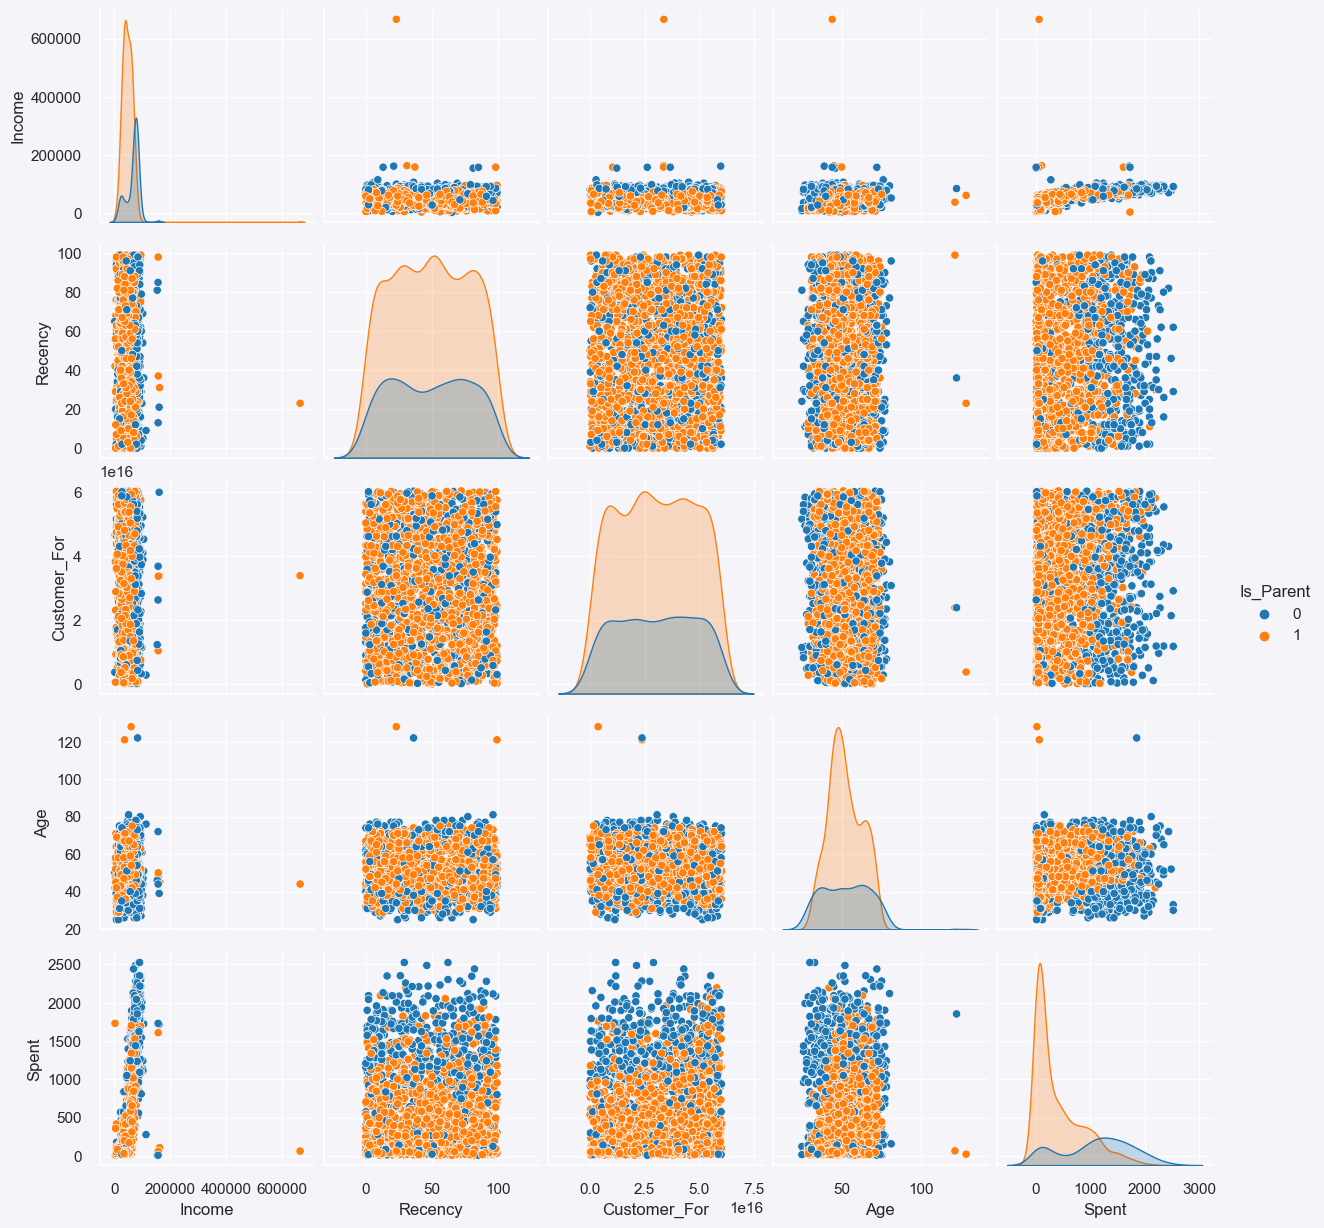

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# Setting up color preferences with a different background color
sns.set(rc={"axes.facecolor": "#F4F4F9", "figure.facecolor": "#F4F4F9"})  # Set background to light gray

# Define a custom color palette for the plot
pallet = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
cmap = colors.ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])

# Plotting the selected features
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()

# Creating pairplot with the specified colors and the 'Is_Parent' hue
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=["#1f77b4", "#ff7f0e"])  # Changed palette to two colors

# Show the plot
plt.show()


### There are a few outliers in the Income and Age features. I will be deleting the outliers in the data. 

In [74]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


## let us look at the correlation amongst the features. 
(Excluding the categorical attributes at this point)

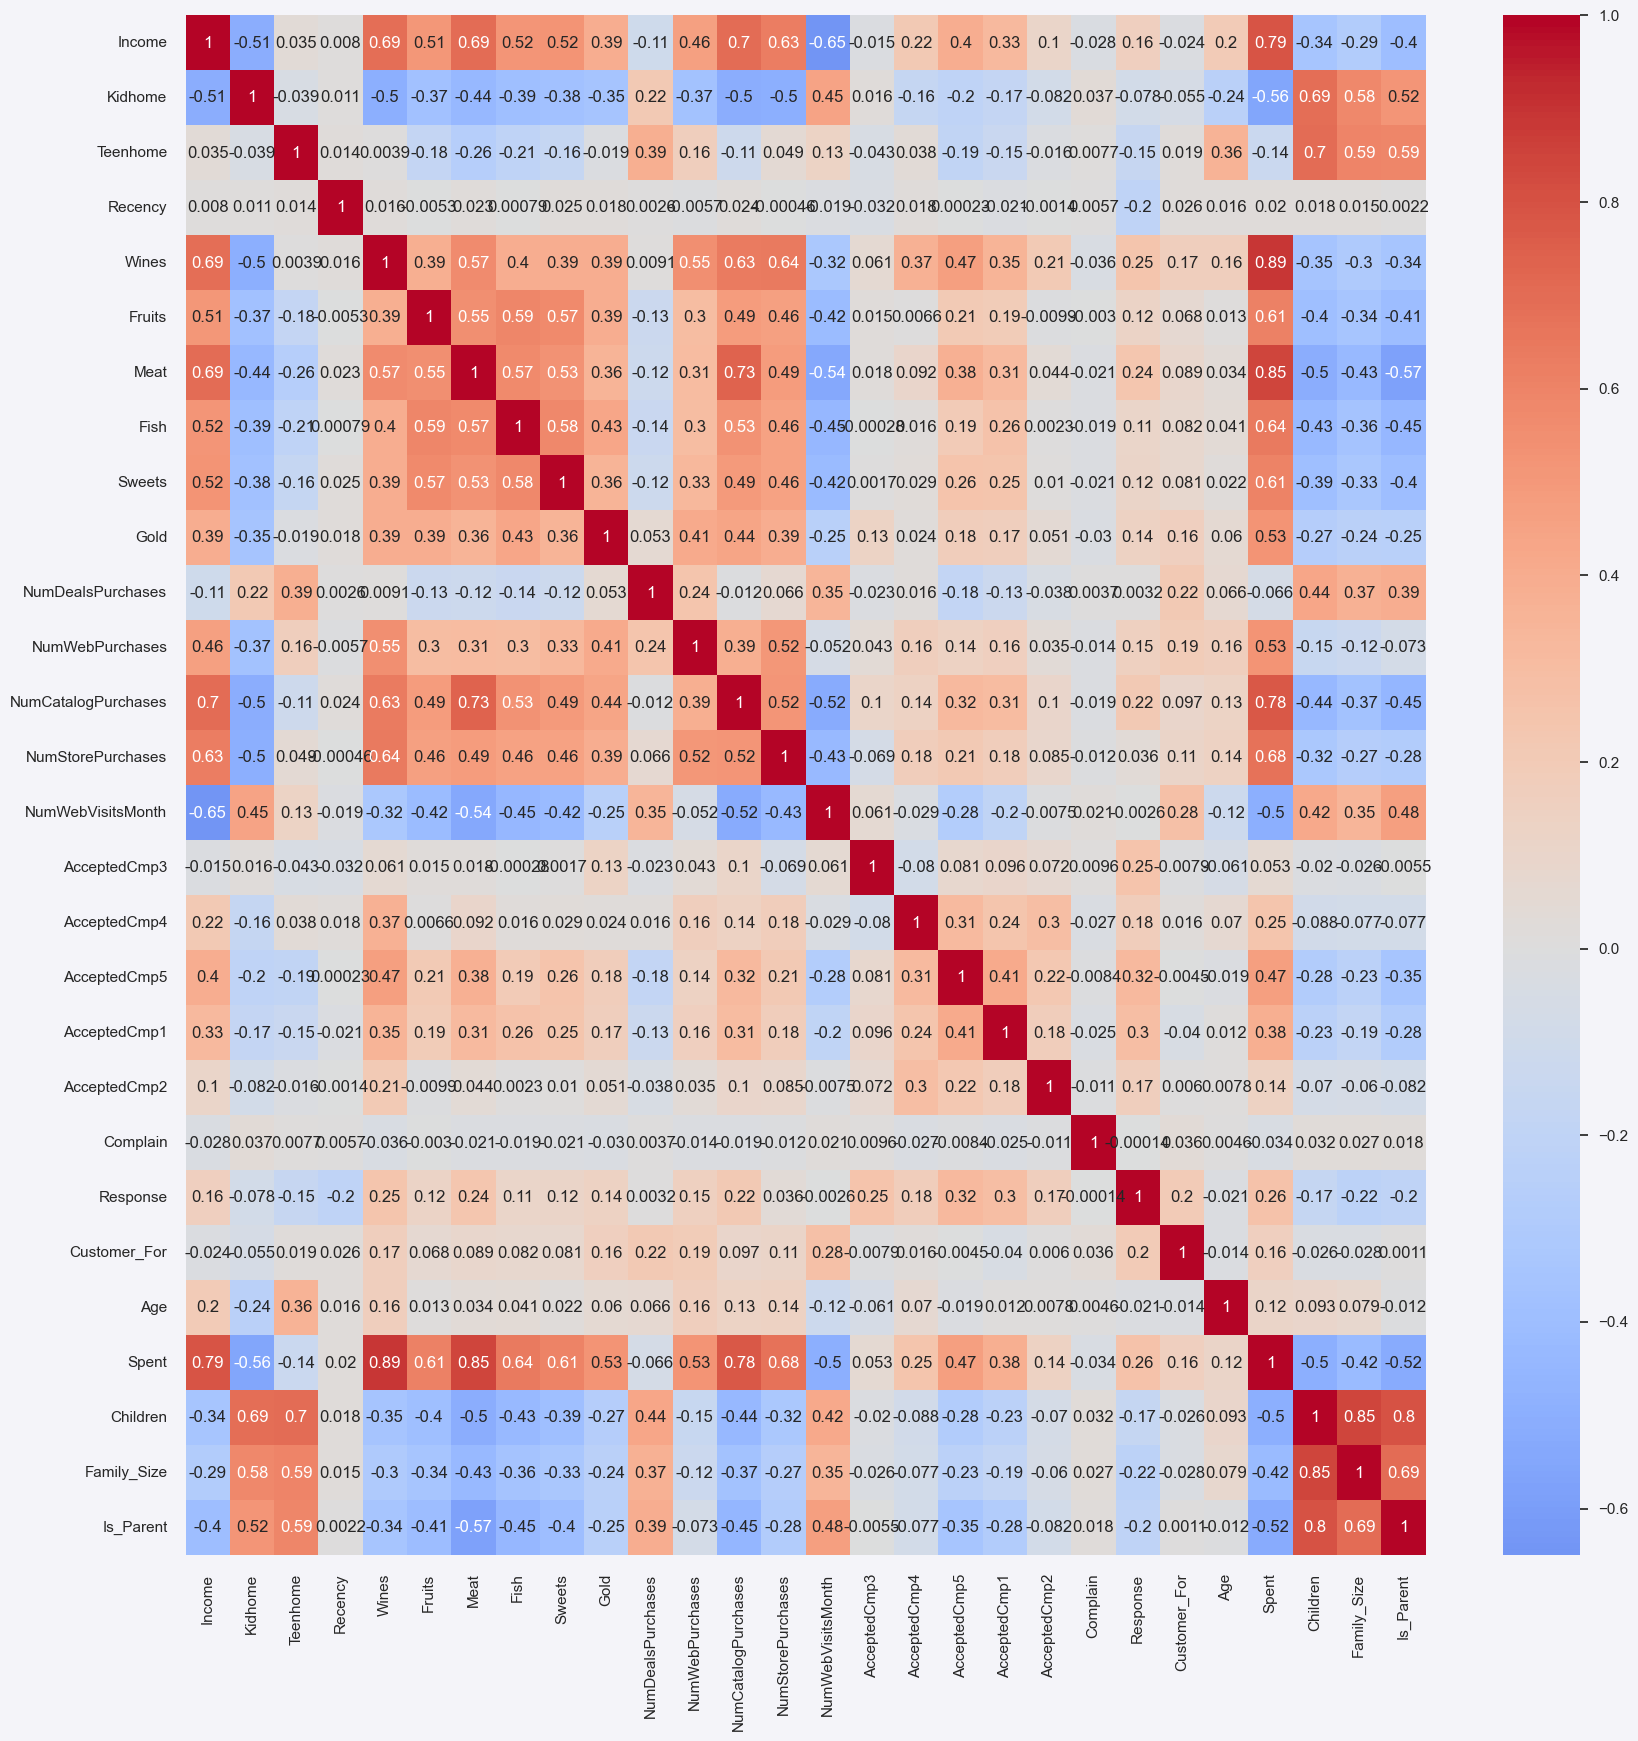

In [76]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()


## The data is quite clean and the new features have been included. 

### Now let's do some preprocessing to perform clustering:

1. **Label encoding the categorical features**  
   - Convert categorical features into numeric values to make them suitable for clustering algorithms.

2. **Scaling the features using the standard scaler**  
   - Standardize the features to ensure they are on the same scale, which is important for clustering algorithms like K-Means that are sensitive to feature magnitudes.

3. **Creating a subset dataframe for dimensionality reduction**  
   - Create a new dataframe by removing unnecessary columns, which will help with the dimensionality reduction process and improve the efficiency of the clustering.


In [77]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [79]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [80]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


 **Creating a copy of the data**:  
  A copy of the original dataset is made using `ds = data.copy()` to avoid altering the original dataset.

 **Creating a subset of the dataframe**:  
  Unnecessary columns related to promotions and complaints, such as `'AcceptedCmp1'`, `'AcceptedCmp2'`, `'Complain'`, and `'Response'`, are dropped using `ds.drop(cols_del, axis=1)` to focus on relevant features for clustering.

 **Scaling the features**:  
  The `StandardScaler` is applied to standardize the features in the dataset.  
  - The scaler is fitted to the data (`scaler.fit(ds)`).
  - The data is then transformed and stored in a new dataframe `scaled_ds` to ensure all features have the same scale.



In [81]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

<a id="2"></a>
        <p style="background-color:#2C3E50; font-family:Arial, sans-serif; color:#ECF0F1; font-size:18px; text-align:center; padding:15px; border-radius:8px; margin-bottom:25px; letter-spacing:1px; font-weight:bold;">DIMENSIONALITY REDUCTION</p>


## Purpose of Dimensionality Reduction

The purpose of dimensionality reduction is to reduce the number of features (dimensions) in the dataset, making it easier to visualize, analyze, and cluster, while maintaining the key information.


In datasets with a large number of features, many of those features might be highly correlated (redundant), which makes it difficult to work with. By reducing the number of features, we can:
- Decrease computational complexity
- Increase model performance (e.g., less overfitting)
- Visualize data in fewer dimensions
- Remove noise or redundant information.

**Principal Component Analysis (PCA)** is a common technique for dimensionality reduction that transforms the data into a smaller set of uncorrelated variables, called principal components, which explain most of the variance in the data.


In [83]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  4.497106e-17  2.878602 -5.978123 -2.539470 -0.781595  2.386380   
col2  2212.0  0.000000e+00  1.709469 -4.194757 -1.323932 -0.173716  1.234923   
col3  2212.0  4.015273e-17  1.231685 -3.625184 -0.853556 -0.051292  0.863841   

           max  
col1  7.452915  
col2  6.168185  
col3  6.746845

### Here the original data is reduced to 3 dimensions, capturing the most important information with minimal loss

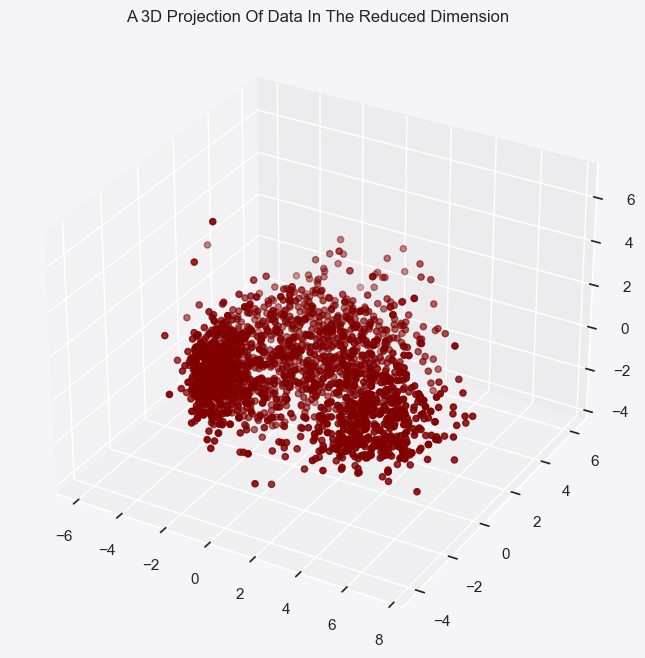

In [84]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

The plot visually shows how the data is distributed in the reduced 3D space, helping to understand the structure and spread of the data after dimensionality reduction.

<a id="2"></a>
        <p style="background-color:#2C3E50; font-family:Arial, sans-serif; color:#ECF0F1; font-size:18px; text-align:center; padding:15px; border-radius:8px; margin-bottom:25px; letter-spacing:1px; font-weight:bold;">CLUSTERING</p>


In this part, I will perform <span style="color:#4E5B6E"><strong>clustering</strong></span> on the data. The goal is to group similar data points together, helping us understand the underlying patterns and structures within the dataset.

Here's the approach:

1. <span style="color:#2E8B57"><strong>Use the Elbow Method</strong></span>:  
   I will begin by applying the <span style="color:#4682B4"><strong>Elbow Method</strong></span> to determine the optimal number of clusters. This method evaluates the <span style="color:#D2691E"><strong>distortion score</strong></span> to show how well the data fits within clusters. When the score levels off, it indicates the ideal number of clusters.

2. <span style="color:#2E8B57"><strong>Apply Agglomerative Clustering</strong></span>:  
   Once the number of clusters is decided, I will use <span style="color:#4682B4"><strong>Agglomerative Clustering</strong></span>. This hierarchical method begins by treating each data point as its own cluster, then merges them step by step based on similarity until the desired number of clusters is formed.

3. <span style="color:#2E8B57"><strong>Visualize the Clusters</strong></span>:  
   After clustering, I will create a <span style="color:#D2691E"><strong>3D scatter plot</strong></span> to visualize the clusters in the reduced 3D space (from PCA). This allows us to assess how the data points are grouped visually and check how well the clustering works.

The rationale behind this approach is to <span style="color:#4E5B6E"><strong>reduce data complexity</strong></span> (via PCA) and then group similar data points together (via clustering) to uncover meaningful patterns. Clustering helps to <span style="color:#4E5B6E"><strong>make sense of the data</strong></span> by identifying natural groupings, which can aid in understanding trends and making predictions.


Elbow Method to determine the number of clusters to be formed:


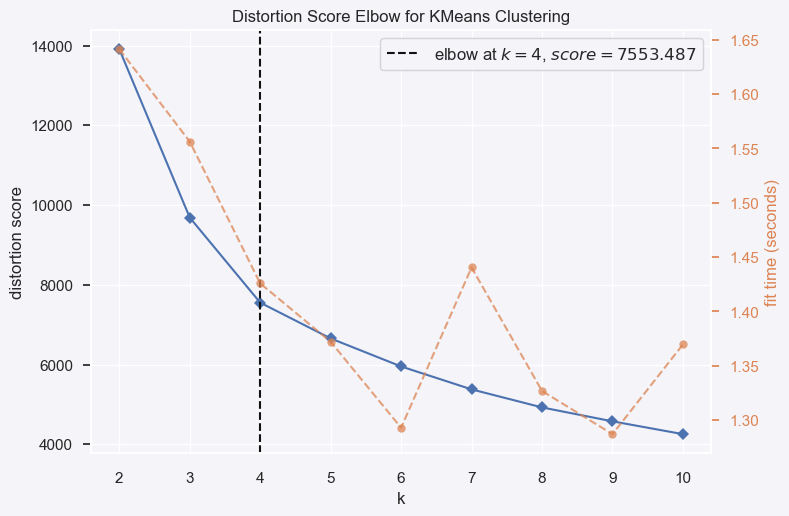

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The **Elbow Method** is used to determine the optimal number of clusters for the data.


This "elbow" point indicates the ideal number of clusters to use, ensuring that the model captures the data's underlying patterns without overfitting or underfitting.

This step is important because choosing the right number of clusters improves the effectiveness and interpretability of the clustering process.




In the next step, I am applying **Agglomerative Clustering** to the PCA-reduced dataset to form clusters.


## Initiating and Fitting the Agglomerative Clustering Model:


Agglomerative clustering is a **hierarchical** clustering method that builds clusters by merging data points iteratively based on their similarity. It's particularly useful when the number of clusters is already determined (in this case, 4) and helps uncover groupings in the data without needing a pre-specified number of clusters at the start.

#### Process:
1. **AgglomerativeClustering** is initialized with `n_clusters=4`, specifying that the data should be divided into four clusters.
2. **fit_predict()** is applied to the PCA-reduced data (`PCA_ds`) to generate the cluster assignments.
3. The resulting cluster labels are stored in the `PCA_ds` dataframe under the "Clusters" column.
4. These cluster labels are then added to the original `data` dataframe as the "Clusters" column, allowing us to associate the cluster assignments with the original dataset.




In [88]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

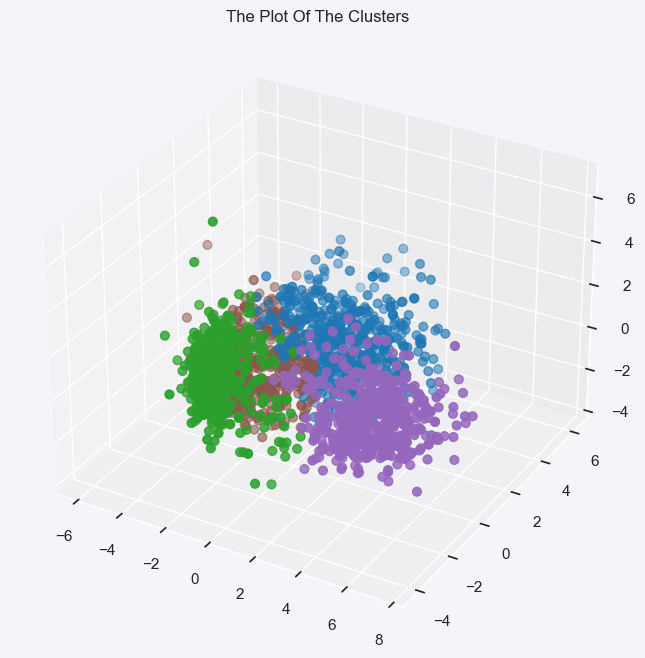

In [89]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<a id="2"></a>
        <p style="background-color:#2C3E50; font-family:Arial, sans-serif; color:#ECF0F1; font-size:18px; text-align:center; padding:15px; border-radius:8px; margin-bottom:25px; letter-spacing:1px; font-weight:bold;">EVALUATION</p>


Now, we evaluate the clusters formed by the Agglomerative Clustering model. Since clustering is an unsupervised learning technique, there are no labeled outcomes to evaluate the model directly. Instead, the evaluation focuses on exploring the patterns and characteristics of each cluster, and how they relate to different features in the dataset.

The goal is to understand how the data points are grouped, which can inform targeted actions, such as marketing strategies or customer segmentation. We will use **Exploratory Data Analysis (EDA)** to visually examine the cluster distribution and identify meaningful patterns within each group.

#### Key Steps in This Section:
1. **Visualizing Cluster Distribution**:
   - A **countplot** is used to display the distribution of data points across the different clusters. This helps us visually assess the balance of the clusters.

2. **Cluster Profiling (Income vs Spending)**:
   - A **scatterplot** is created to visualize how clusters differ based on income and spending. The **hue** parameter is used to color-code the clusters, allowing us to visually compare cluster profiles.

3. **Analyzing Product Preferences**:
   - A combination of **swarmplots** and **boxenplots** is used to explore how spending differs between clusters. This reveals which cluster spends more on particular products.

4. **Campaign Response Analysis**:
   - A new feature, `Total_Promos`, is created by summing up accepted promotions across all campaigns. A **countplot** is then used to show how many promotions were accepted by customers in each cluster.

5. **Purchasing Behavior**:
   - **Jointplots** are used to examine the relationships between various purchasing behaviors (web, catalog, and store purchases) and spending within each cluster.

These steps will help us gain insights into the clusters and make data-driven decisions for targeted actions.

---


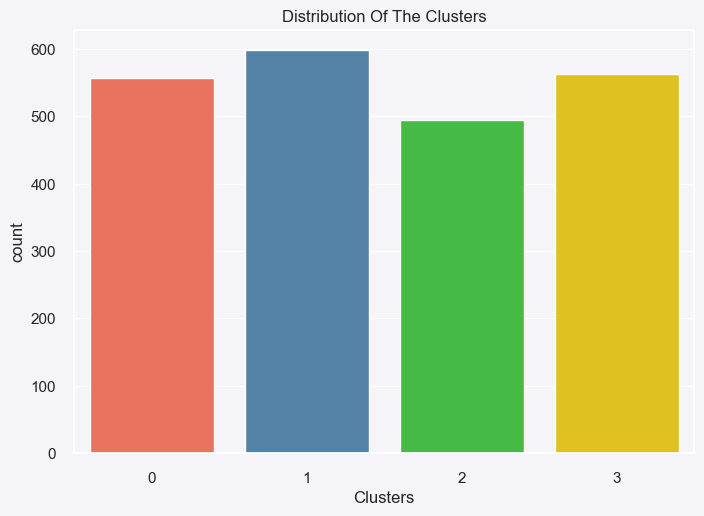

In [96]:

# Visualizing the distribution of clusters
pal = ["#FF6347", "#4682B4", "#32CD32", "#FFD700"]
pl = sns.countplot(x=data["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


### Look like a good distribution

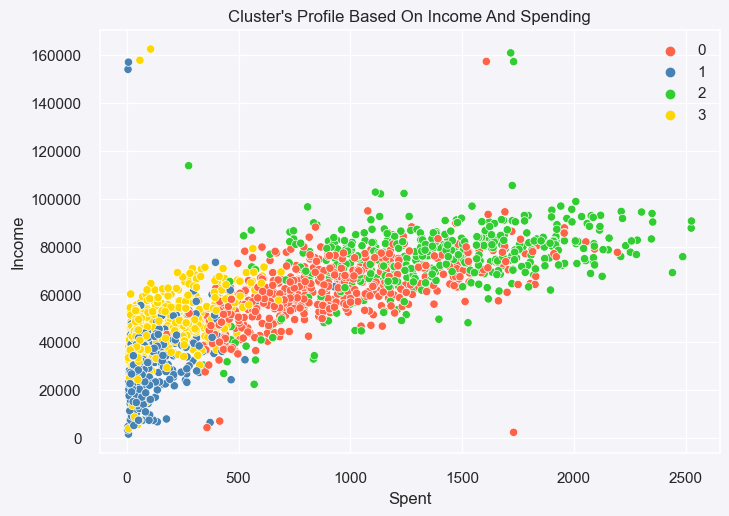

In [95]:
# Step 2: Profiling clusters based on income and spending with distinctive colors
pal = ["#FF6347", "#4682B4", "#32CD32", "#FFD700"]  # Distinctive Red, Blue, Green, and Yellow

pl = sns.scatterplot(data=data, x=data["Spent"], y=data["Income"], hue=data["Clusters"], palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


**Income vs  spending plot shows the clusters pattern**
* group 0: Average income higher spending 
* group 1: lower income lower spending
* group 2: higher income higher spending 
* group 3: higher income lower spending




Next, I’m going to check how the clusters are spread out across different product types like Wines, Fruits, Meat, Fish, Sweets, and Gold

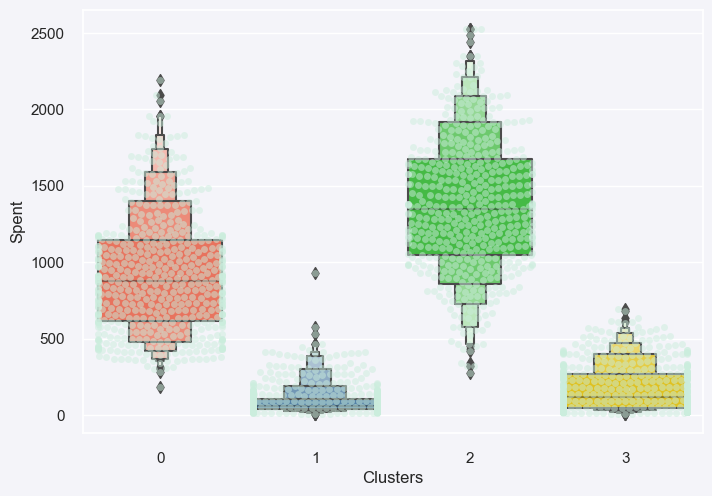

In [97]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 0.

We can explore what each cluster is spending on for the targeted marketing strategies.

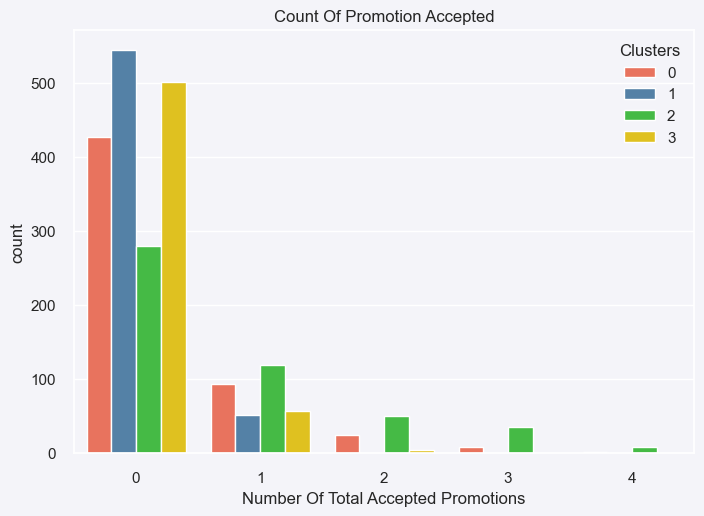

In [98]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

The response to the campaigns hasn’t been great so far, with only a few people participating overall. Interestingly, nobody has taken part in all **5** campaigns. It might be a good idea to design more targeted and better-thought-out campaigns to improve sales.

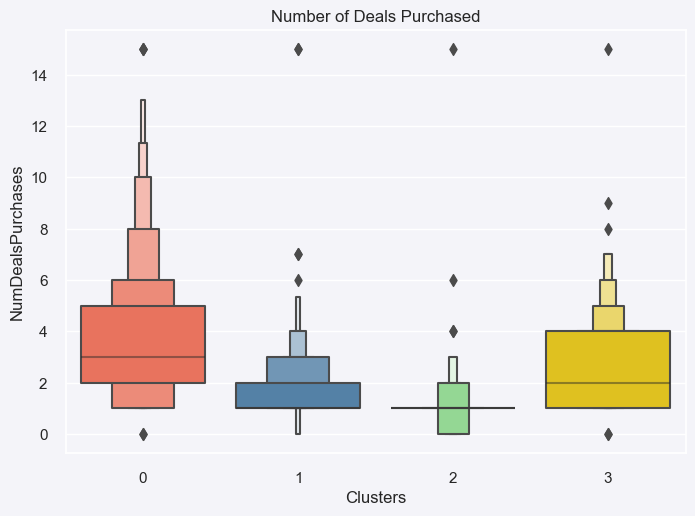

In [99]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Cluster 0 has the highest number of deals purchased, represented by the tallest bar. This suggests that Cluster 0 had the most active purchasing activity compared to the other clusters.

Cluster 1 has the second-highest number of deals purchased, but the bar is significantly shorter than the bar for Cluster 0.

Cluster 2 has a relatively low number of deals purchased, with the bar being much shorter compared to Clusters 0 and 1.

Cluster 3 has the lowest number of deals purchased, with a small bar at the end of the chart.



### so our best customers "group 2" is least interested in deals.. ok intresting!!

<Figure size 800x550 with 0 Axes>

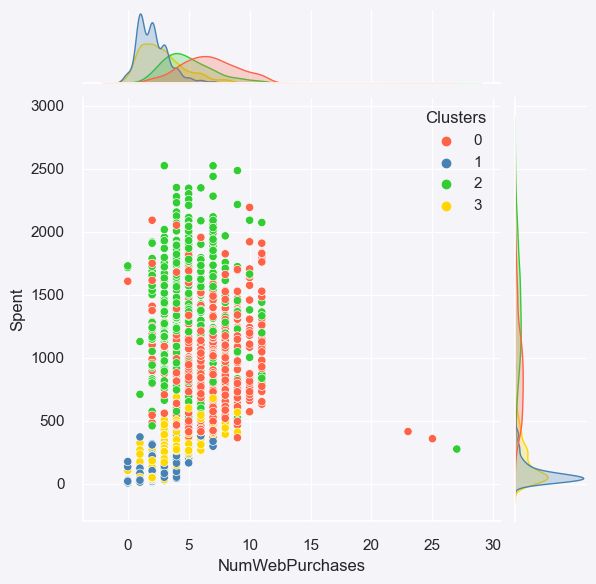

<Figure size 800x550 with 0 Axes>

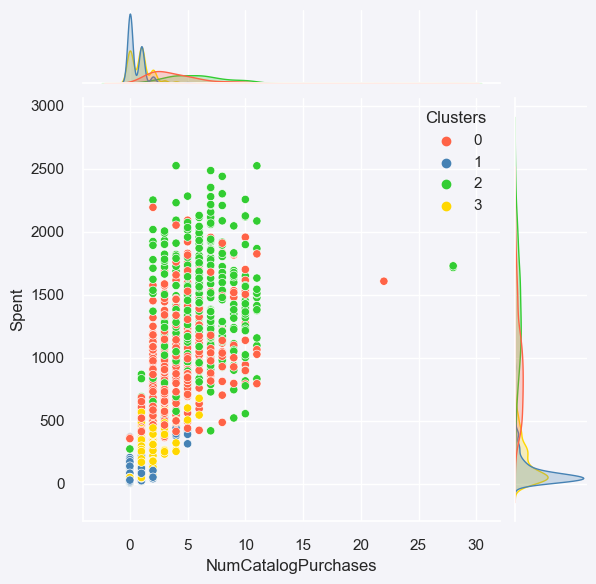

<Figure size 800x550 with 0 Axes>

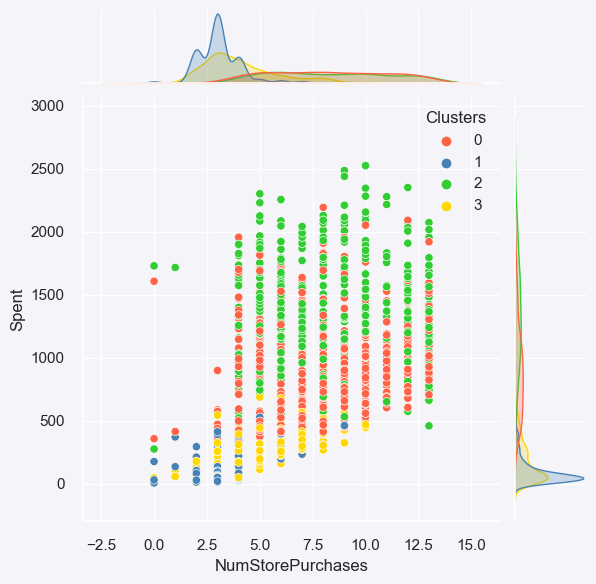

<Figure size 800x550 with 0 Axes>

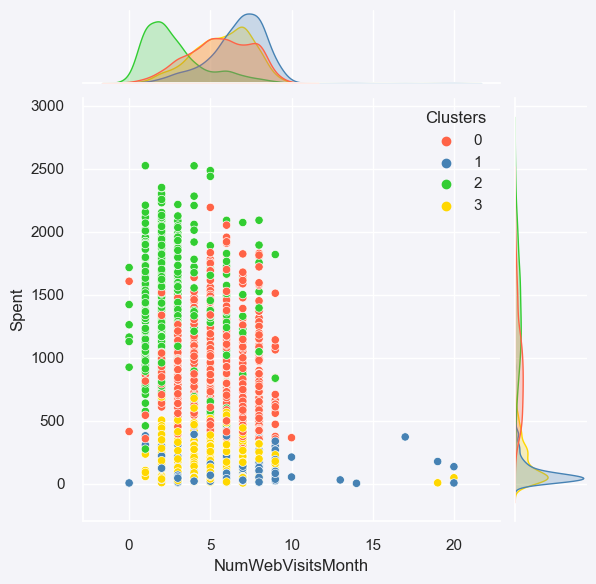

In [100]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()


<a id="2"></a>
        <p style="background-color:#2C3E50; font-family:Arial, sans-serif; color:#ECF0F1; font-size:18px; text-align:center; padding:15px; border-radius:8px; margin-bottom:25px; letter-spacing:1px; font-weight:bold;">
UNDERSTANDING CUSTOMER SEGMENTS</p>



Now, the goal is to understand who makes up each cluster by analyzing the personal characteristics of the customers. By profiling these clusters, we can determine which groups include the retail store's most valuable customers and which groups require more focus from the marketing team.

This is achieved by visualizing various customer traits such as family size, education level, age, and parenting status against their spending behavior. Insights gained from this profiling will help in tailoring marketing strategies and understanding customer needs better.


<Figure size 800x550 with 0 Axes>

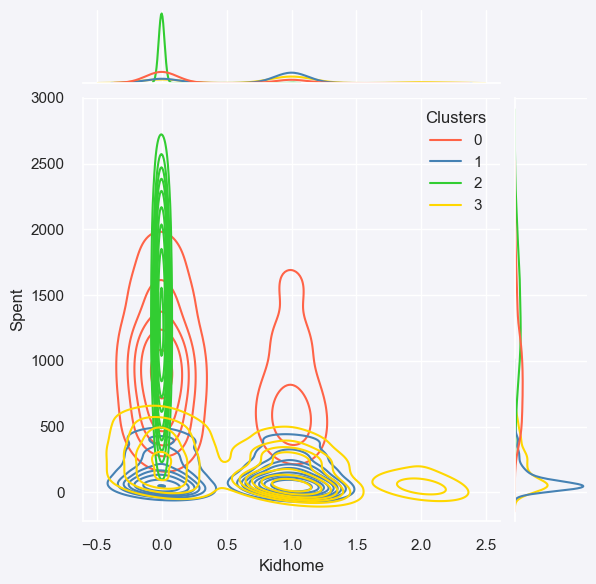

<Figure size 800x550 with 0 Axes>

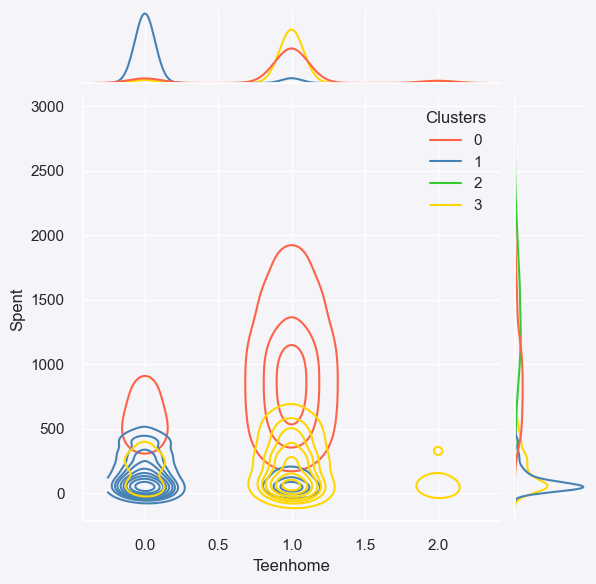

<Figure size 800x550 with 0 Axes>

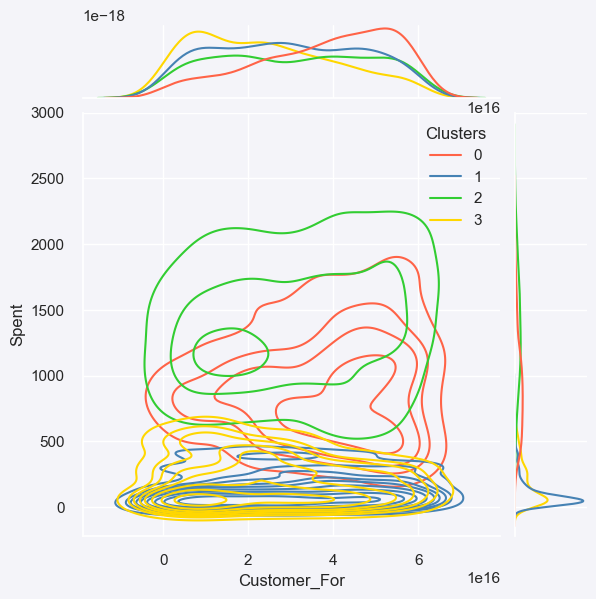

<Figure size 800x550 with 0 Axes>

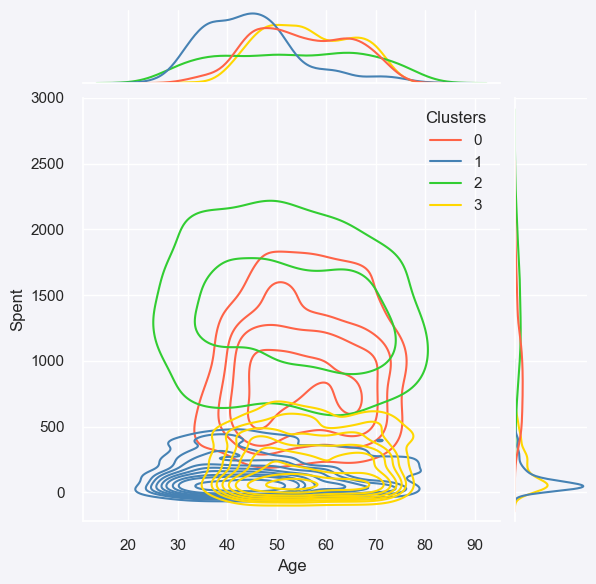

<Figure size 800x550 with 0 Axes>

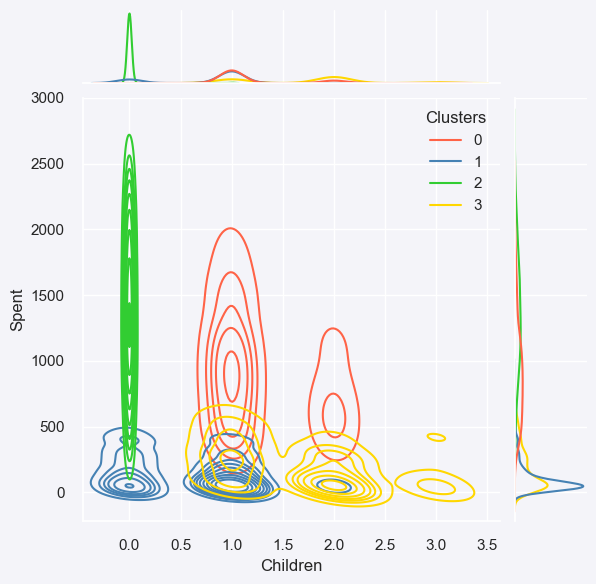

<Figure size 800x550 with 0 Axes>

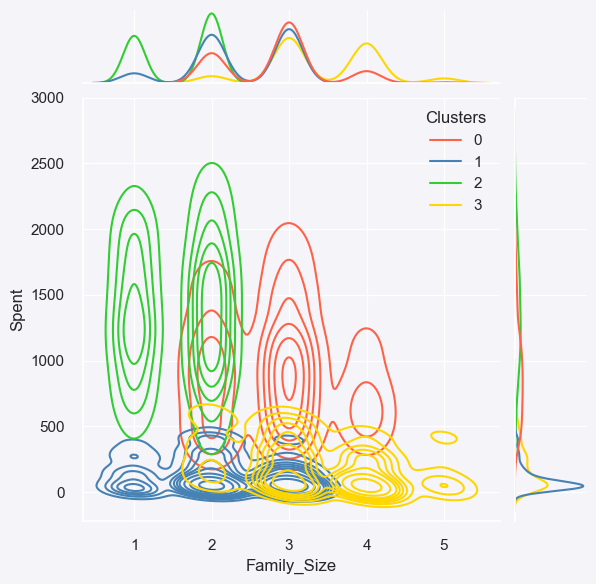

<Figure size 800x550 with 0 Axes>

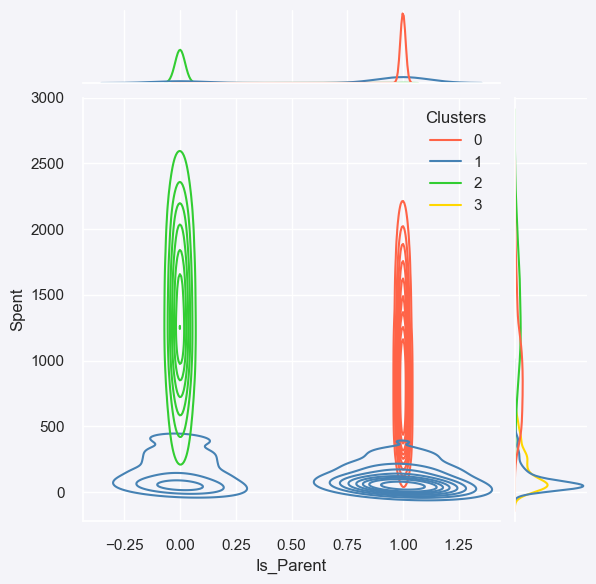

<Figure size 800x550 with 0 Axes>

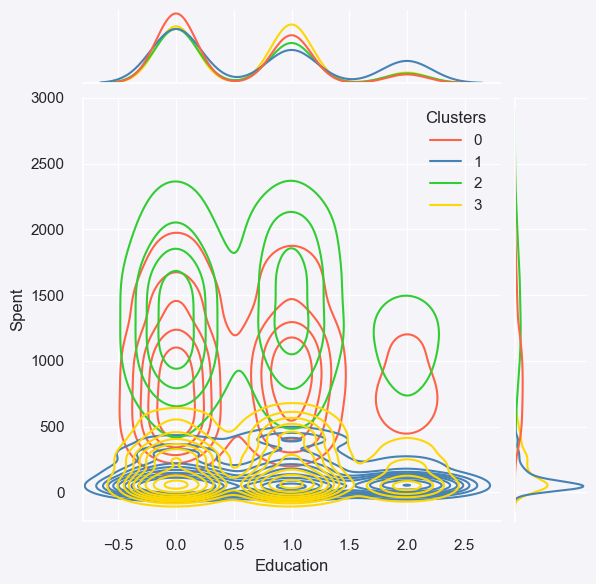

<Figure size 800x550 with 0 Axes>

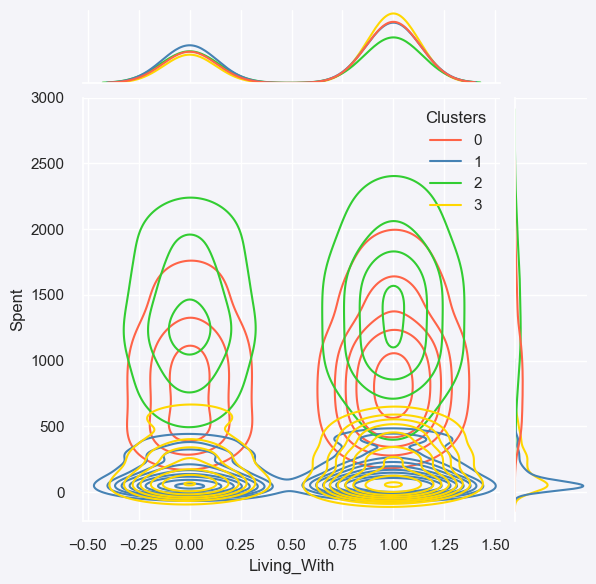

In [101]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()




# Customer Profiles



### Group 1: Family-Oriented, Higher Income, Higher Spending
- **Key Traits:** Older, family-oriented, educated, high income, spend more.
- **Lifestyle:** Likely to live with a partner and value family and health-related products.

### Group 2: Independent, Lower Income, Lower Spending
- **Key Traits:** Younger, live alone, lower income, spend less.
- **Lifestyle:** Focus on individual needs and less likely to spend on non-essentials.

### Group 3: Mixed Ages & Families, High Income, High Spending
- **Key Traits:** Diverse in age, mixed families, higher income, spend more.
- **Lifestyle:** Spend on a variety of goods and services, both personal and family-related.

### Group 4: Young Families, Lower Education, Lower Spending
- **Key Traits:** Younger families with children, moderate income, spend less.
- **Lifestyle:** Focus on essentials for the family, budget-conscious.

---

## Spending Behavior

- **Top Spenders:**
  - Group 3: High income and high spending.
  - Group 1: High income, willing to spend on family needs.

- **Lowest Spenders:**
  - Group 2: Lower income, lower spending habits.

- **Most Deal-Oriented Customers:**
  - Group 1: Respond well to deals and promotions.
  - Group 4: Deal-sensitive, but spend less overall.

---

## My Recommendations for Sales & Marketing 

### For Group 1 - Family-Oriented, High Spend
- **What to Sell:** Family products, health-related items, senior discounts.
- **How to Reach Them:** Offer loyalty programs and exclusive deals.

### For Group 2 - Young, Independent, Lower Spend
- **What to Sell:** Affordable lifestyle products, tech gadgets, entertainment.
- **How to Reach Them:** Focus on digital marketing and referral programs for discounts.

### For Group 3 - High Income, High Spend
- **What to Sell:** Premium products, tech, family packages, travel.
- **How to Reach Them:** Use personalized offers, cross-sell, and bundling deals.

### For Group 4 - Young Families, Budget-Conscious
- **What to Sell:** Essential products, family-focused deals, savings bundles.
- **How to Reach Them:** Use time-limited offers and cost-saving bundles.

---

## Summary

- **Top Priority:** Target Group 3 with premium products and personalized offers.
- **Value Deals:** Engage Group 1 with loyalty programs and exclusive discounts.
- **Affordable Options:** Focus on Group 2 with budget-friendly products and digital promotions.
- **Family Essentials:** Offer Group 4 savings bundles and time-limited promotions.

--- 


# --- END--- 